# Simple CNN model for CIFAR-10


In [ ]:
import numpy
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout, Input, BatchNormalization
from keras.constraints import maxnorm
from keras.models import Model
from keras.optimizers import SGD, Adam
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

load data

In [ ]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

normalize inputs from 0-255 to 0.0-1.0

In [ ]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
print(X_train.shape)

(50000, 32, 32, 3)
(50000, 1)


one hot encode labels

In [ ]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [ ]:
print(num_classes)

10


Create the model

In [ ]:
inputs = Input(X_train.shape[1:])

# Create 3 sandwiched layers, each to the pattern {Conv, Drop, Conv, Pool}
x = Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
x = Dropout(0.2)(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = Dropout(0.2)(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Conv2D(128, (3, 3), padding='same', activation='relu')(x)
x = Dropout(0.2)(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

# Flatten to use in fully connected layers
x = Flatten()(x)
x = Dropout(0.2)(x)

# Create fully connected layers
x = Dense(1024, activation='relu', kernel_constraint=maxnorm(3))(x)
x = Dropout(0.2)(x)

x = Dense(512, activation='relu', kernel_constraint=maxnorm(3))(x)
x = Dropout(0.2)(x)

# Define output layer via softmax, for non-binary categorical classification
outputs = Dense(num_classes, activation='softmax')(x)

# Instantiate model
model = Model(inputs=inputs, outputs=outputs)

Compile model

In [ ]:
epochs = 70
lrate = 0.001
opt_adam = Adam(learning_rate=lrate)
model.compile(loss='categorical_crossentropy', optimizer=opt_adam, metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_18 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_19 (Dropout)         (None, 16, 16, 64)        0   

Fit the model

In [ ]:
# Import callback functions from keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Create list of Instantiated callbacks to be used
my_callbacks = [EarlyStopping(monitor='val_accuracy', patience=3), ModelCheckpoint('/checkpoint', monitor="val_accuracy")]

# Fit model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=128, verbose=1, callbacks=my_callbacks)

Epoch 1/70
391/391 [==============================] - 9s 18ms/step - loss: 1.9363 - accuracy: 0.2699 - val_loss: 1.3597 - val_accuracy: 0.5081
INFO:tensorflow:Assets written to: /checkpoint/assets
Epoch 2/70
391/391 [==============================] - 7s 17ms/step - loss: 1.2774 - accuracy: 0.5298 - val_loss: 1.1026 - val_accuracy: 0.6112
INFO:tensorflow:Assets written to: /checkpoint/assets
Epoch 3/70
391/391 [==============================] - 6s 16ms/step - loss: 1.0393 - accuracy: 0.6332 - val_loss: 0.9194 - val_accuracy: 0.6807
INFO:tensorflow:Assets written to: /checkpoint/assets
Epoch 4/70
391/391 [==============================] - 6s 16ms/step - loss: 0.8767 - accuracy: 0.6924 - val_loss: 0.8087 - val_accuracy: 0.7188
INFO:tensorflow:Assets written to: /checkpoint/assets
Epoch 5/70
391/391 [==============================] - 6s 16ms/step - loss: 0.7719 - accuracy: 0.7241 - val_loss: 0.7254 - val_accuracy: 0.7523
INFO:tensorflow:Assets written to: /checkpoint/assets
Epoch 6/70
391/

Final evaluation of the model

In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 80.63%


Predicting the first 4 images

________________________________________________________________________________________________
#1
Raw Prediction: [[1.4274690e-03 4.4145563e-05 7.3465616e-02 8.4455895e-01 9.9645264e-04
  3.2906529e-02 4.6428654e-02 2.8847186e-05 7.2745970e-05 7.0521673e-05]]
Prediction Choice: cat
Label: cat


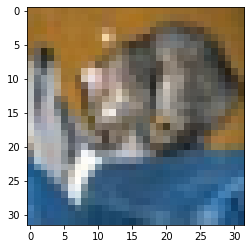

________________________________________________________________________________________________
#2
Raw Prediction: [[3.9968328e-04 4.1245436e-03 5.0343170e-09 2.2542501e-08 8.2642009e-09
  6.9819754e-11 6.0882490e-09 3.8930876e-11 9.9542052e-01 5.5157605e-05]]
Prediction Choice: ship
Label: ship


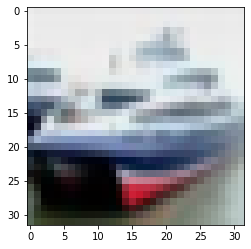

________________________________________________________________________________________________
#3
Raw Prediction: [[4.3108699e-01 8.9942040e-03 3.2231745e-03 3.1134648e-02 1.1967016e-04
  1.0238382e-03 2.8264924e-04 2.5803572e-03 4.6522728e-01 5.6327220e-02]]
Prediction Choice: ship
Label: ship


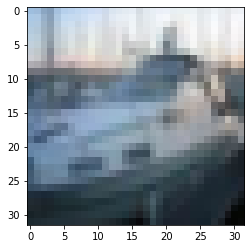

________________________________________________________________________________________________
#4
Raw Prediction: [[9.3273020e-01 6.3884676e-05 2.5724484e-02 1.2951435e-03 1.2637927e-04
  3.1305954e-05 3.0946447e-07 3.2441068e-05 3.9904520e-02 9.1282462e-05]]
Prediction Choice: airplane
Label: airplane


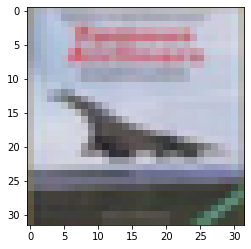

In [ ]:
# Import pyplot
import matplotlib.pyplot as plt

# Create list of labels for readable output
labels_list = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Get image, prediction vector(via softmax), prediction choice(as word, not index), and label from y_test(as word, not index)
for i in range(4):
    plt.imshow(X_test[i])
    print('_' * 96)
    print('#' + str(i + 1))
    print('Raw Prediction: ' + str(model.predict(X_test[i:i+1])))
    print('Prediction Choice: ' + labels_list[model.predict(X_test[i:i+1]).argmax()])
    print('Label: ' + labels_list[y_test[i].argmax()])
    plt.show()